# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Wednesday, ~~Oct 25, 2021 at 11:59pm~~ Oct 27, 2021 at 11:59pm**

## Imports

In [267]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    average_precision_score,
    recall_score,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The positive class in the above example is has disease, because that's what we want to spot.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [186]:
results_dict = {"A": {}, "B": {}}

In [187]:
# accuracy = correct predictions / total examples
TP_A = 2
FP_A = 0
TN_A = 100
FN_A = 8

TP_B = 6
FP_B = 10
TN_B = 90
FN_B = 4

def get_accuracy(TP, FP, TN, FN):
    return (TP + TN) / (TP + TN + FP + FN)

results_dict["A"]["accuracy"] = get_accuracy(TP_A, FP_A, TN_A, FN_A)
results_dict["B"]["accuracy"] = get_accuracy(TP_B, FP_B, TN_B, FN_B)

In [188]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [189]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [190]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

I would choose model A because it has a higher accuracy.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [191]:
"""
Helper functions I created to calculate evaluation metrics
"""
def get_recall(TP, FN):
    return TP / (TP + FN)

def get_precision(TP, FP):
    return TP / (TP + FP)

def get_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

results_dict["A"]["precision"] = get_precision(TP_A, FP_A)
results_dict["B"]["precision"] = get_precision(TP_B, FP_B)
results_dict["A"]["recall"] = get_recall(TP_A, FN_A)
results_dict["B"]["recall"] = get_recall(TP_B, FN_B)
results_dict["A"]["f1"] = get_f1(results_dict["A"]["precision"], results_dict["A"]["recall"])
results_dict["B"]["f1"] = get_f1(results_dict["B"]["precision"], results_dict["B"]["recall"])




In [192]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [193]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [194]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [195]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [196]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [197]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [198]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
precision,1.000000,0.375000
recall,0.200000,0.600000
f1,0.333333,0.461538


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1. f1 is more informative in this problem because there exists a class imbalance between positive and negatives due to disease classifications representing an overwhelming majority of the predictions compared to disease. Precision alone is not enough because we also want to account for false negatives (as false negatives can have more damaging consequences); similarly, having a high recall doesn't mean that we've correctly identified all disease cases (e.g. we could label everyone as having disease but still get recal=1). Since accuracy is unreliable and we need to balance out precision and recall, we should use f1 to get the harmonic mean of precision and recall.

go with recall -> predicting positives is more important
also want tomake sure precision isnt terribly low

2. We would choose model B because it has a higher f1. We want to maximize f1 as it represents the balance of precision and recall.

choose recall


<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

Examples:
1. 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [199]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [200]:
"""
TP = predicted churn and actually churned
FP = predicted churn but did not churn
TN = predicted not churn and actually did not churn
FN = predicted not churn but actually churned
"""
train_df["churn"].value_counts()

False    1984
True      349
Name: churn, dtype: int64

Yes, there is a class imbalance because there are many users who did not churn, but only a handful of users who churned. This is part of the nature of the problem when many people are likely to continue subscribing while very few people leve. In this case, we care about the false negatives (FN - predicted not churn, but actually churned) because it could impact the recurring revenue the company receives. To deal with the imbalance, we could either set `class_weight` to balanced, or optimize `class_weight` using hyperparameter optimization to obtain the `class_weight` that yields to the highest recall.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [201]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

drop_features = [
    "number vmail messages",
    "phone number",
]

numeric_features = [
    "account length",
    "total day minutes",
    "total day calls",
    "total day charge",
    "total eve minutes",
    "total eve charge",
    "total night minutes",
    "total night calls",
    "total night charge",
    "total intl calls",
    "total intl charge",
    "customer service calls",
]

categorical_features = [
    "state",
    "area code",
    "international plan",
    "voice mail plan",
    
#     convert last two into binary -> dont use mine
]

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler(), 
#     standard scaler
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
)

I am doing transformations SimpleImputer and MinMaxScaler to the following numerical features: "account length", "total day minutes", "total day calls", "total day charge", "total eve minutes", "total eve charge","total night minutes", "total night calls", "total night charge", "total intl calls", "total intl charge", "customer service calls" because I want to impute missing values and bring the existing values to the same scale that's within 0 to 1; I didn't use StandardScaler here because doing such transformation would result in some negative values for these numerical features, and having a negative value for total minutes or charge, for example, doesn't really make sense in the context of this problem.

I am doing transformations SimpleImputer and OneHotEncoder to the following categorical features: "state", "area code", "international plan", "voice mail plan" because each feature has a set number of categories in their columns and I want to use binary columns to represent those categories.

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [202]:
preprocessor.fit(X_train)
# adapted from lecture 10
ohe_columns = list(
    preprocessor
    .named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)
enc_columns = numeric_features + ohe_columns

X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train),
    index=X_train.index,
    columns=enc_columns,
)
X_train_enc.head()

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve charge,total night minutes,total night calls,total night charge,total intl calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
1402,0.285124,0.608324,0.521212,0.608317,0.577922,0.577881,0.658764,0.519084,0.658934,0.20,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1855,0.272727,0.311003,0.812121,0.311033,0.401750,0.401860,0.191928,0.404580,0.191850,0.25,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
633,0.500000,0.417332,0.630303,0.417337,0.253247,0.253072,0.555461,0.442748,0.555486,0.20,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1483,0.438017,0.667332,0.551515,0.667337,0.460474,0.460312,0.731866,0.511450,0.731661,0.15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2638,0.429752,0.357469,0.703030,0.357478,0.738283,0.738293,0.616427,0.541985,0.616301,0.45,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1. Even though the `area code` features are numbers to begin with, each area code still represents a distinct category. Therefore, it makes sense to use one-hot encoding because we have a fixed number of categories.
2. The possible values of `area code` in this dataset are 408, 415, 510 as seen below when taking the `value_counts()` of the column.
3. The new features created to replace area code were `area code_408`	`area code_415`	`area code_510`

In [203]:
X_train["area code"].value_counts()

415    1178
408     588
510     567
Name: area code, dtype: int64

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [315]:
def get_evaluation_metrics(TN, FP, FN, TP):
    res = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1-score": [],
    }
    res["accuracy"].append(get_accuracy(TP, FP, TN, FN)) # get_accuracy is a helper function I created in 1.3
    res["precision"].append(get_precision(TP, FP)) # get_precision, get_recall, and get_f1 are helpers I created in 1.4
    res["recall"].append(get_recall(TP, FN))
    res["f1-score"].append(get_f1(res["precision"][0], res["recall"][0]))
    return res

# adapted from https://ml-learn.mds.ubc.ca/en/module7
dummy = DummyClassifier()
cv_scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
print("Mean cv scores")
print(pd.DataFrame(cv_scores).mean())

pipe = make_pipeline(preprocessor, dummy)
pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test, predicted_y).ravel()
print(TN, FP, FN, TP)
res = get_evaluation_metrics(TN, FP, FN, TP)
print("\nEaluation metrics")
print(pd.DataFrame(res))

Mean cv scores
fit_time       0.001742
score_time     0.000598
test_score     0.850408
train_score    0.850407
dtype: float64
866 0 134 0

Ealuation metrics
   accuracy  precision  recall  f1-score
0     0.866        NaN     0.0       NaN


/var/folders/dk/l981_ws13h38rn90s6tfh9vw0000gn/T/ipykernel_34232/2713831159.py:8: RuntimeWarning: invalid value encountered in long_scalars
  return TP / (TP + FP)


The dummy model actually produced a decent validation score of around 0.85 on average. However, it is most likely just due to random luck that the model was able to guess much of the 

prediction in the test set correct.
dummy classifier takes the most frequent result
in this case, false dominates
so it makes sense that the score is high

I received this warning:
```
RuntimeWarning: invalid value encountered in long_scalars
  return TP / (TP + FP)
```
Based on my research on stackoverflow (https://stackoverflow.com/questions/43216185/runtimewarning-invalid-value-encountered-in-longlong-scalars), this is caused by null-division. Since both FP and TP are = 0, it makes sense that both precision and recall are nan.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [217]:
pipe = make_pipeline(preprocessor, LogisticRegression())
print("Mean cv scores")
print(pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True)).mean())

pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, predicted_y).ravel()
res = get_evaluation_metrics(TN, FP, FN, TP) # get_evaluation_metrics is a helper I created in 2.6
print("\nEaluation metrics")
print(pd.DataFrame(res))

Mean cv scores
fit_time       0.074399
score_time     0.008741
test_score     0.858548
train_score    0.865731
dtype: float64

Ealuation metrics
   accuracy  precision    recall  f1-score
0     0.876   0.589286  0.246269  0.347368


scores are not high.
The logistic regression classifier performed slightly better than the dummy classifier. However, it only performed marginally better. I am not too satisfied with the results.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [219]:
pipe = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
print("Mean cv scores")
print(pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True)).mean())

pipe.fit(X_train, y_train)
predicted_y = pipe.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, predicted_y).ravel()
res = get_evaluation_metrics(TN, FP, FN, TP) # get_evaluation_metrics is a helper I created in 2.6
print("\nEaluation metrics")
print(pd.DataFrame(res))

Mean cv scores
fit_time       0.073659
score_time     0.009382
test_score     0.758238
train_score    0.778824
dtype: float64

Ealuation metrics
   accuracy  precision    recall  f1-score
0     0.773   0.342373  0.753731  0.470862


Compared to the previous model, this model actually performed a little worse. I would prefer the previous model because there's less of a gap between the train and validation scores, and the validation score was higher in the previous model.

recall
we care more about detecting potential churn (aka positives, or people who want to leave) so we can act on it before they leave
in this case, having false positives doesnt hurt the customer (i.e. precision)
therefore this model is better.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [228]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "logisticregression__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="f1"
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'phone '
                                                                          'number']),
                                                                        ('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                 

In [316]:
print("Best cross-validation f1 score")
print(grid_search.best_score_)
print("Best params")
print(grid_search.best_params_)

Best cross-validation f1 score
0.49440272244274375
Best params
{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced'}


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

In [252]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=0.01, class_weight="balanced"))
pipe.fit(X_train, y_train)

labels = ["no churn", "churn"]

confusion matrix


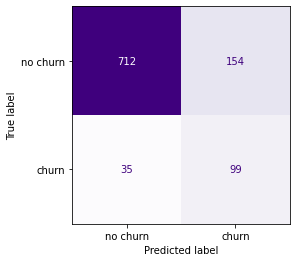

In [253]:
# adapted from lecture 9
print("confusion matrix")
disp = plot_confusion_matrix(
    pipe,
    X_test,
    y_test,
    display_labels=labels,
    values_format="d",
    cmap=plt.cm.Purples,
    colorbar=False,
)

In [254]:
print("classification report\n",
    classification_report(
        y_test, pipe.predict(X_test), target_names=labels
    )
)

classification report
               precision    recall  f1-score   support

    no churn       0.95      0.82      0.88       866
       churn       0.39      0.74      0.51       134

    accuracy                           0.81      1000
   macro avg       0.67      0.78      0.70      1000
weighted avg       0.88      0.81      0.83      1000



precision-recall curve
average precision of logistic regression: 0.462


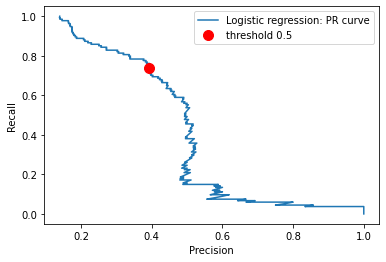

In [261]:
print("precision-recall curve")
precision, recall, thresholds = precision_recall_curve(
    y_test, pipe.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="Logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, pipe.predict(X_test)),
    recall_score(y_test, pipe.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5"
)
plt.legend(loc="best")
ap = average_precision_score(y_test, pipe.predict_proba(X_test)[:,1])
print("average precision of logistic regression: {:0.3f}".format(ap))

ROC curve
AUC for logistic regression: 0.825


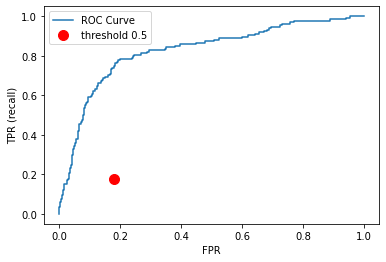

In [268]:
print("ROC curve")
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds-0.5))

plt.plot(
    fpr[default_threshold],
    fpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
print("AUC for logistic regression: {:.3f}".format(auc))

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [270]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [271]:
train_df, test_df = train_test_split(housing_df, test_size=0.2)
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
11239,3.6422,19.0,4.344203,0.909420,730.0,2.644928,33.82,-117.96,2.094
6286,4.8854,30.0,5.280632,0.944664,905.0,3.577075,34.04,-117.93,1.781
5442,4.7000,39.0,5.533333,1.040580,867.0,2.513043,34.00,-118.45,3.347
1681,4.3173,32.0,5.850949,1.065041,981.0,2.658537,38.03,-122.36,1.754
3181,2.6218,14.0,4.684076,1.099363,2191.0,2.791083,36.31,-119.77,0.691


Yes, we should apply transformations to the data to transform all the values to the same scale. Without doing so, certain features would dominate over others and would introduce bias.

In [274]:
numeric_features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude", "Longitude"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features)
)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                                  'Population', 'AveOccup', 'Latitude',
                                  'Longitude', 'Longitude'])])

In [275]:
X_train = train_df.drop(columns=["MedHouseVal"])
y_train = train_df["MedHouseVal"]

X_test = test_df.drop(columns=["MedHouseVal"])
y_test = test_df["MedHouseVal"]

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [278]:
dummy = DummyRegressor()
pipe = make_pipeline(preprocessor, dummy)
res = cross_validate(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
pd.DataFrame(res)

,fit_time,score_time,test_score,train_score
0,0.028862,0.003502,-0.000364,0.0
1,0.022956,0.004716,-0.000006,0.0
2,0.022525,0.002766,-0.000952,0.0
3,0.019945,0.003011,-0.000521,0.0
4,0.022698,0.005443,-0.001122,0.0


The default metric used is R^2 score. The closer the score is to 1, the better the model. Scores < 0 are considered to be extremely bad.

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [288]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

pipe_ridge = make_pipeline(preprocessor, models["Ridge"])
pipe_rf = make_pipeline(preprocessor, models["Random Forest"])


cv1 = cross_validate(pipe_ridge, X_train, y_train, cv=5, scoring=score_types_reg, return_train_score=True)
cv2 = cross_validate(pipe_rf, X_train, y_train, cv=5, scoring=score_types_reg, return_train_score=True)

ValueError: Shape of passed values is (5, 12), indices imply (12, 12)

In [289]:
pd.DataFrame(cv1)

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,0.031910,0.006094,-0.513133,-0.530010,-0.716333,-0.728018,-0.527528,-0.533925,0.612126,0.602932,-32.004575,-31.839493
1,0.027731,0.007270,-0.568903,-0.517986,-0.754256,-0.719713,-0.532288,-0.528755,0.568047,0.612395,-31.994486,-31.458846
2,0.025244,0.004081,-0.540134,-0.523186,-0.734938,-0.723316,-0.536095,-0.529511,0.609036,0.603645,-31.374225,-31.673747
3,0.030176,0.009482,-1.211671,-0.523194,-1.100759,-0.723321,-0.548806,-0.524133,0.099860,0.606318,-33.235855,-31.268555
4,0.032901,0.007383,-0.511903,-0.530401,-0.715474,-0.728286,-0.526346,-0.533947,0.603919,0.604840,-31.564723,-31.915279


In [290]:
pd.DataFrame(cv2)

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,7.909364,0.090611,-0.257807,-0.036579,-0.507747,-0.191258,-0.328622,-0.123518,0.805125,0.972596,-18.770393,-6.907815
1,8.214785,0.094229,-0.272059,-0.036477,-0.521593,-0.190988,-0.334181,-0.124026,0.793433,0.972705,-19.454213,-6.913251
2,7.880100,0.110902,-0.265178,-0.036718,-0.514954,-0.191619,-0.337615,-0.123595,0.808057,0.972183,-18.076072,-7.012977
3,8.463619,0.119278,-0.263550,-0.036775,-0.513371,-0.191768,-0.339481,-0.123791,0.804211,0.972328,-19.144824,-6.947721
4,8.002835,0.094339,-0.255442,-0.036663,-0.505413,-0.191475,-0.329823,-0.124407,0.802353,0.972686,-18.532387,-7.012373


The model is doing much better than our dummy baseline. In particular, the validation scores of this model is in the 0.80, significantly better than the negative validation scores of our baseline model.

Comparing the performance of the two model, the baseline model was definitely a lot faster during training time.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [ ]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude', 'Longitude',
                                                   'Longitude'])])),
                ('randomforestregressor', RandomForestRegressor())])

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 